In [1]:
import numpy as np
import tensorflow as tf 
import keras

In [9]:
nx = 101
nz = 201
dx = np.random.rand(1, nx)
dz = np.random.rand(1, nz)
lambda_grid = np.random.rand(nx,nz)

Wx = np.random.rand(nx, nz)
Wz = np.random.rand(nx, nz)
print(wake_shape.shape)

(101, 201)


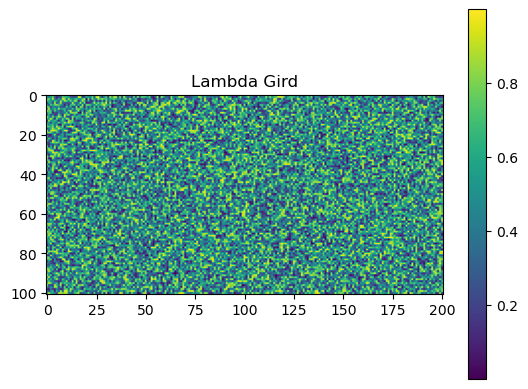

In [13]:
import matplotlib.pyplot as plt


plt.title("Lambda Gird")
plt.imshow(lambda_grid)
plt.colorbar()

# Construct Graph

In [25]:
index = np.zeros((nx, nz), dtype=int)
count = 0 
for i in range(nx):
    for j in range(nz):
        index[i,j] = count
        count += 1  
print(index)

[[    0     1     2 ...   198   199   200]
 [  201   202   203 ...   399   400   401]
 [  402   403   404 ...   600   601   602]
 ...
 [19698 19699 19700 ... 19896 19897 19898]
 [19899 19900 19901 ... 20097 20098 20099]
 [20100 20101 20102 ... 20298 20299 20300]]


In [27]:
index_mapping = []
for i in range(nx):
    for j in range(nz):
        value = index[i,j]
        if i-1>=0:
            index_mapping.append([value, index[i-1, j]])
        if i +1 < nx:
            index_mapping.append([value, index[i+1, j]])
        if j -1 >= 0:
            index_mapping.append([value, index[i, j-1]])
        if j +1 < nz:
            index_mapping.append([value, index[i, j+1]])
        if j +1 < nz and i + 1 < nx:
            index_mapping.append([value, index[i+1, j+1]])
        if j +1 < nz and i - 1 >= 0:
            index_mapping.append([value, index[i-1, j+1]])
        if j -1 >= 0 and i - 1 >= 0:
            index_mapping.append([value, index[i-1, j-1]])
        if j -1 >= 0 and i + 1 <nx:
            index_mapping.append([value, index[i+1, j-1]])
            
print(len(index_mapping))

160600


In [28]:
print(index_mapping[:10])

[[0, 201], [0, 1], [0, 202], [1, 202], [1, 0], [1, 2], [1, 203], [1, 201], [2, 203], [2, 1]]


In [29]:
import torch